<a href="https://colab.research.google.com/github/abdyraman/peopleanalytics/blob/main/educational_peoplesanalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Imported dependencies for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
#Downloading two sheets in one excel file
df_sheet1 = pd.read_excel('Lead Employee Listening - Work task.xlsx',sheet_name="Demographic")
df_sheet2 = pd.read_excel('Lead Employee Listening - Work task.xlsx',sheet_name="Raw Data")


In [ ]:
# Set the first row as the header
df_sheet2.columns = df_sheet2.iloc[0]  # Set the first row as column names
df_sheet2 = df_sheet2.drop(0)  # Drop the first row since it's now the header
# Reset the index to avoid issues with the dropped row
df_sheet2 = df_sheet2.reset_index(drop=True)

In [ ]:
#Combined two datasets on "ID" column
combined_df=pd.merge(df_sheet1,df_sheet2,on='ID')


In [ ]:
#Reset index of the dataframe on "ID"
combined_df_indexed=combined_df.set_index('ID')
combined_df_indexed

Country            Tenure                   Level  \
ID                                                      
1    Europe  Less than 1 year  Individual contributor   
2       USA        5-10 years                 Manager   
3    Canada         10+ years                Director   
4    Canada         1-5 years                     VP+   
5    Europe         1-5 years                 Manager   
..      ...               ...                     ...   
96      USA         10+ years                Director   
97   Canada  Less than 1 year                 Manager   
98   Canada         5-10years  Individual contributor   
99      USA  Less than 1 year  Individual contributor   
100  Canada  Less than 1 year                     VP+   

    I am proud to work for this company  \
ID                                        
1                                     4   
2                                     4   
3                                     5   
4                                     5   
5                                     4   
..                                  ...   
96                                    3   
97                                    3   
98                                    4   
99                                    1   
100                                   5   

    I rarely think about looking for a new job with another company  \
ID                                                                    
1                                                    5                
2                                                    4                
3                                                    4                
4                                                    4                
5                                                    5                
..                                                 ...                
96                                                   4                
97                                                   2                
98                                                   3                
99                                                   2                
100                                                  4                

    I would recommend this company to people I know as a great place to work  \
ID                                                                             
1                                                    5                         
2                                                    5                         
3                                                    3                         
4                                                    5                         
5                                                    5                         
..                                                 ...                         
96                                                   5                         
97                                                   4                         
98                                                   2                         
99                                                   1                         
100                                                  4                         

    My work gives me a feeling of personal accomplishment  \
ID                                                          
1                                                    5      
2                                                    3      
3                                                    4      
4                                                    3      
5                                                    4      
..                                                 ...      
96                                                   3      
97                                                   5      
98                                                   3      
99                                                   1      
100  

In [ ]:
# There are 100 rows and 23 columns in the data
combined_df_indexed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 24 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   Country                                                                                     100 non-null    object
 1   Tenure                                                                                      99 non-null     object
 2   Level                                                                                       99 non-null     object
 3   I am proud to work for this company                                                         100 non-null    object
 4   I rarely think about looking for a new job with another company                             100 non-null    object
 5   I would recommend this company to people I know as a gr

In [ ]:
#Checked for NaN values and found two missing values
combined_df_indexed.isnull().sum()

Country                                                                                       0
Tenure                                                                                        1
Level                                                                                         1
I am proud to work for this company                                                           0
I rarely think about looking for a new job with another company                               0
I would recommend this company to people I know as a great place to work                      0
My work gives me a feeling of personal accomplishment                                         0
This company motivates me to contribute more than is normally required to complete my work    0
Engagement index                                                                              0
There is open and honest communication at this company                                        0
At this company, there is effective collaboration between teams                               0
This company provides me with the opportunity for learning and development                    0
I receive appropriate recognition when I do a good job                                        0
I trust my manager                                                                            0
My job is challenging and interesting                                                         0
On my team, decisions are made in a timely manner                                             0
My manager supports my efforts to balance my work and personal life                           0
I am comfortable voicing my ideas and opinions, even if they are different from others        0
I have the training I need to do my job effectively                                           0
I receive feedback that helps me improve my performance                                       0
I am encouraged to come up with better ways of doing things                                   0
This company is a safe place to work                                                          0
Working at this company has a positive impact on my well-being.                               0
My manager encourages collaboration on my team                                                0
dtype: int64

There is one row with two missing values in the dataset, under ID 79, where the cells for 'Level' and 'Tenure' were empty.

# Descriptive statistics

In [ ]:
#Checking the unique answer points per feature
unique_counts_objects = combined_df_indexed.select_dtypes('object').nunique()
unique_counts_objects

Country                                                                                        3
Tenure                                                                                         5
Level                                                                                          5
I am proud to work for this company                                                            5
I rarely think about looking for a new job with another company                                5
I would recommend this company to people I know as a great place to work                       5
My work gives me a feeling of personal accomplishment                                          5
This company motivates me to contribute more than is normally required to complete my work     5
Engagement index                                                                              19
There is open and honest communication at this company                                         5
At this company, there is effective collaboration between teams                                5
This company provides me with the opportunity for learning and development                     5
I receive appropriate recognition when I do a good job                                         5
I trust my manager                                                                             4
My job is challenging and interesting                                                          5
On my team, decisions are made in a timely manner                                              5
My manager supports my efforts to balance my work and personal life                            5
I am comfortable voicing my ideas and opinions, even if they are different from others         5
I have the training I need to do my job effectively                                            5
I receive feedback that helps me improve my performance                                        5
I am encouraged to come up with better ways of doing things                                    5
This company is a safe place to work                                                           5
Working at this company has a positive impact on my well-being.                                5
My manager encourages collaboration on my team                                                 5
dtype: int64

In [ ]:
# Looping through each categorical variable and printing its unique values
for i in unique_counts_objects.index:
    print('Unique values of', i, set(combined_df_indexed[i]))

Unique values of Country {'Europe', 'USA', 'Canada'}
Unique values of Tenure {'5-10years', '5-10 years', 'Less than 1 year', '1-5 years', nan, '10+ years'}
Unique values of Level {'Individual contributor', 'Individual contrbutor', nan, 'Manager', 'VP+', 'Director'}
Unique values of I am proud to work for this company {1, 2, 3, 4, 5}
Unique values of I rarely think about looking for a new job with another company {1, 2, 3, 4, 5}
Unique values of I would recommend this company to people I know as a great place to work {1, 2, 3, 4, 5}
Unique values of My work gives me a feeling of personal accomplishment {1, 2, 3, 4, 5}
Unique values of This company motivates me to contribute more than is normally required to complete my work {1, 2, 3, 4, 5}
Unique values of Engagement index {1.8, 2.4, 3.8, 3.6, 4.4, 4.2, 3.2, 3.4, 4, 2, 2.6, 4.6, 4.8, 3, 1.6, 1.2, 2.2, 2.8, 1.4}
Unique values of There is open and honest communication at this company {1, 2, 3, 4, 5}
Unique values of At this company, there

I corrected the typo in the value name 'Individual Contrbutor,' changing it to 'Individual Contributor in the "Level" column. Additionally, I resolved the inconsistency in the spelling in the "Tenure" column where '5-10 years' appeared in two variations. Both cases have been unified to ensure consistent spelling.

In [ ]:
# Replace the misspelled value in the 'Level' and 'Tenure' columns
combined_df_indexed['Level'] = combined_df_indexed['Level'].replace('Individual contrbutor', 'Individual contributor')
combined_df_indexed['Tenure'] = combined_df_indexed['Tenure'].replace('5-10years', '5-10 years')


<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


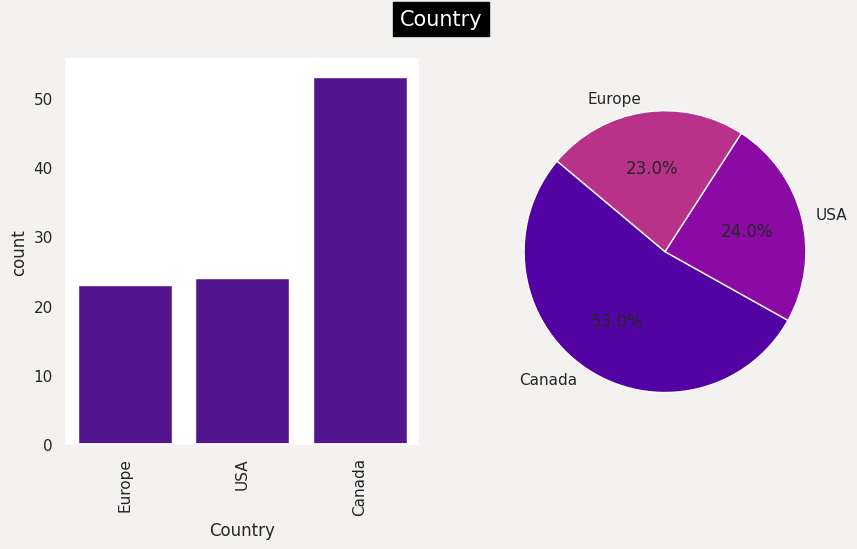

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


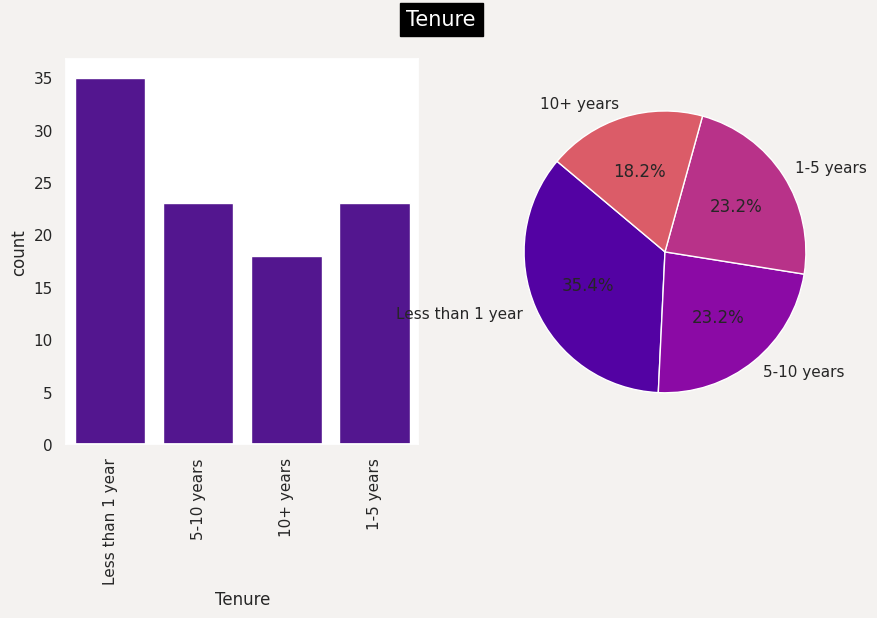

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


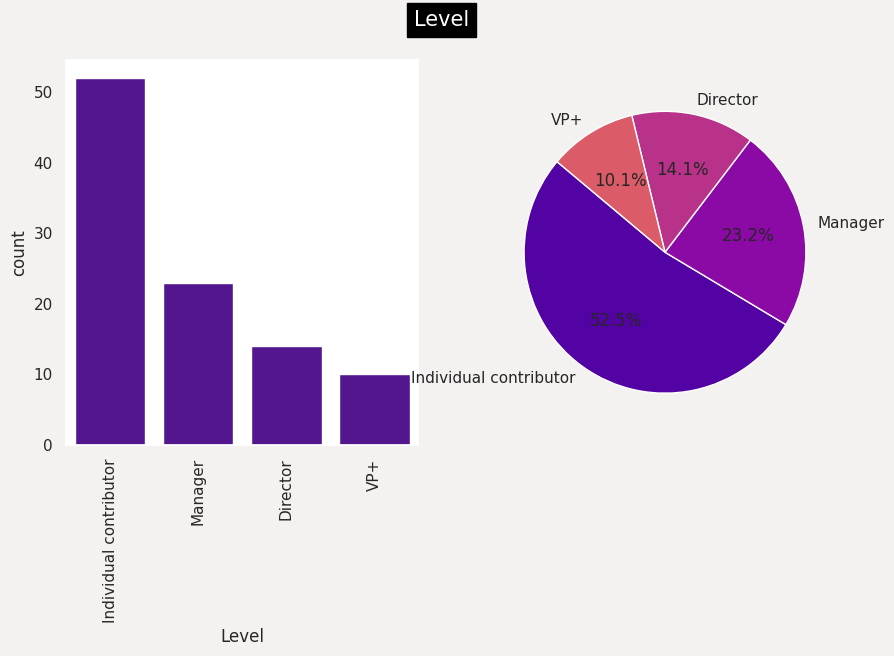

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


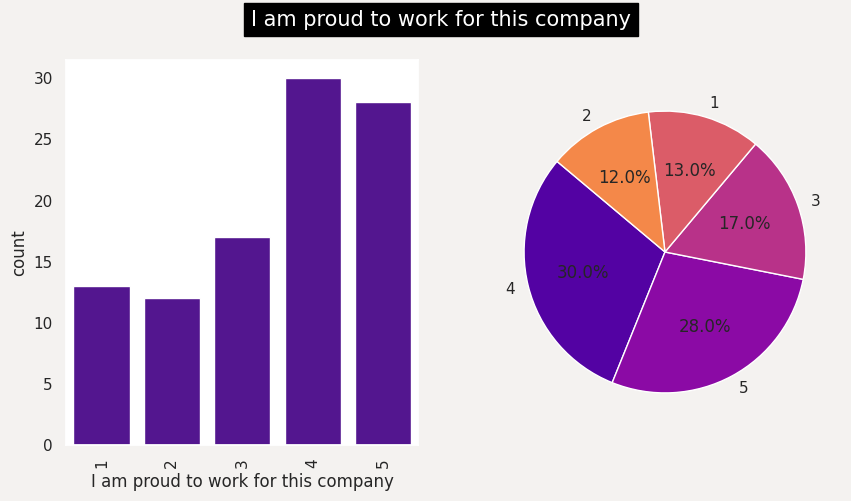

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


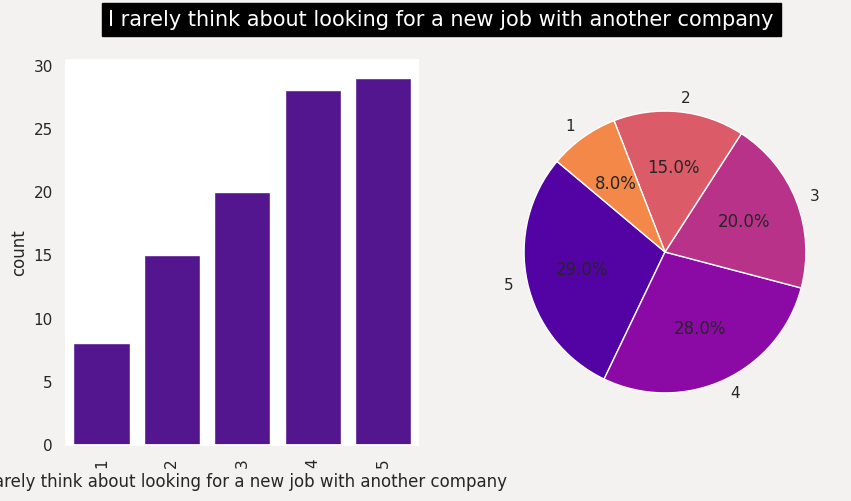

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


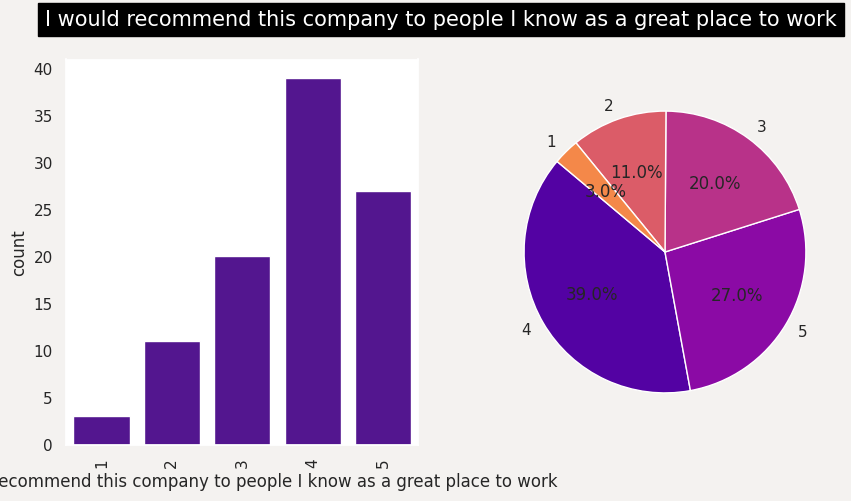

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


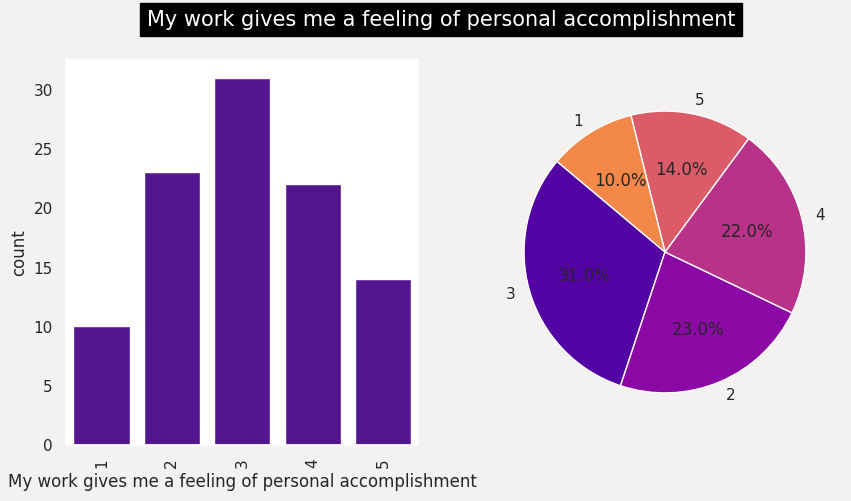

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


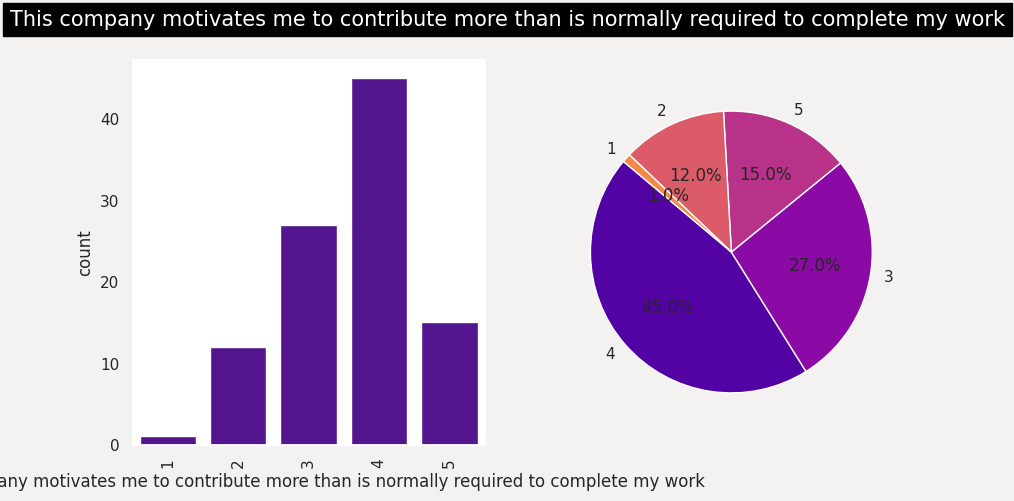

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


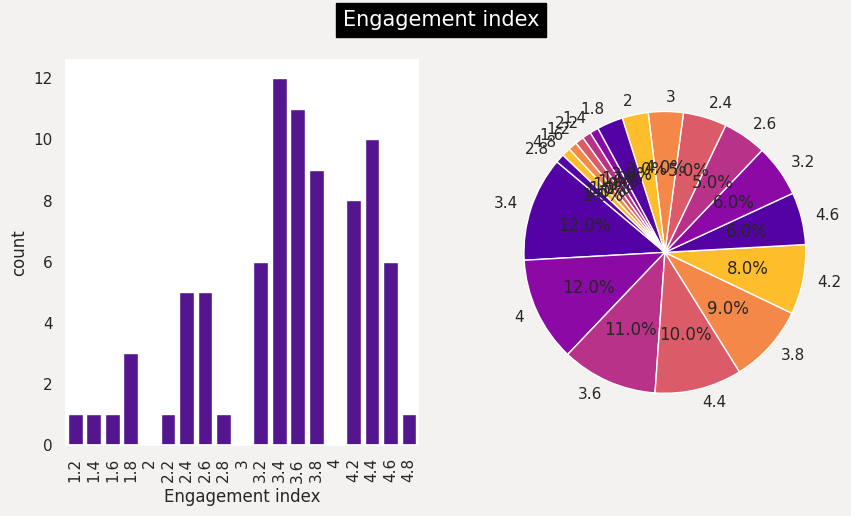

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


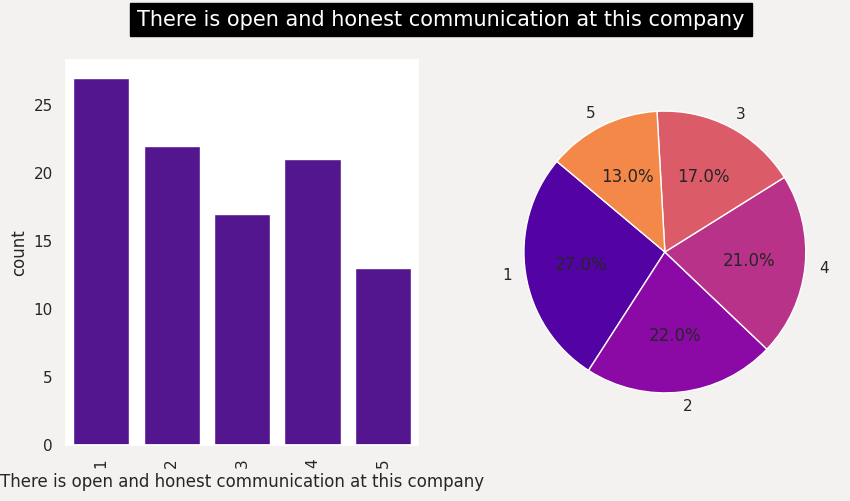

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


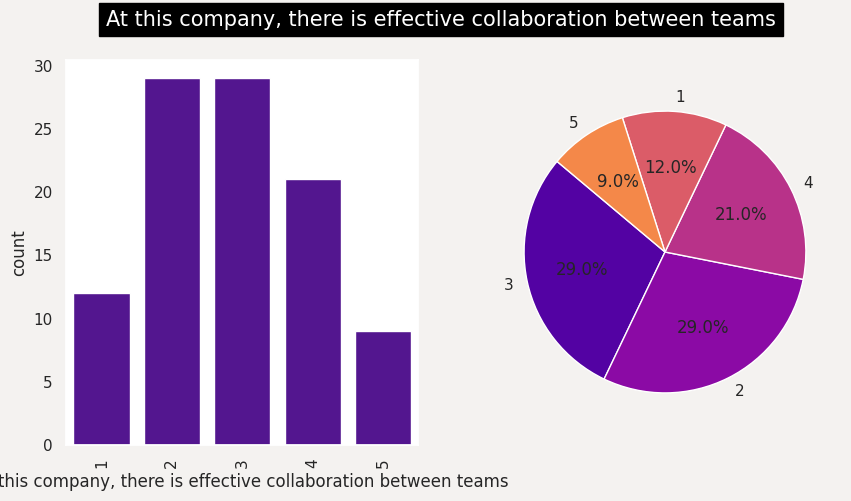

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


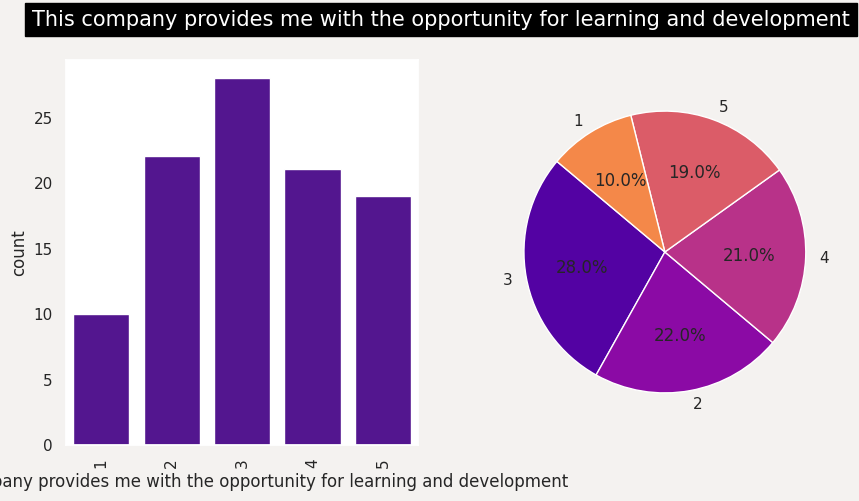

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


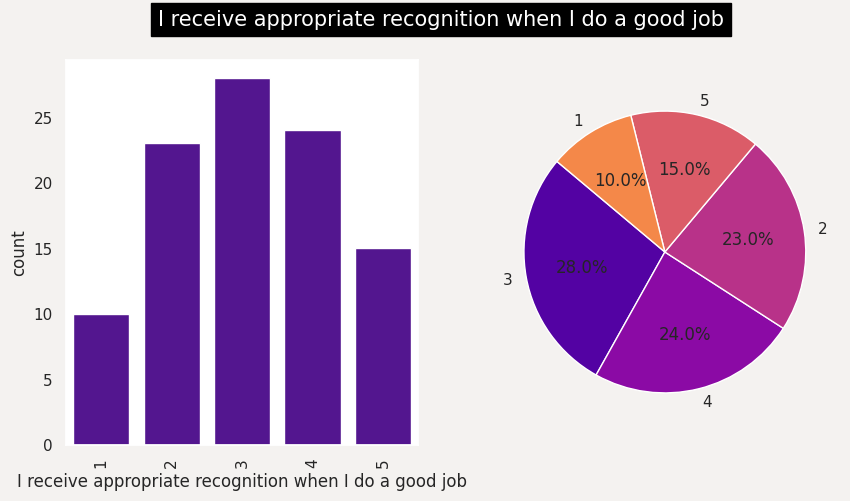

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


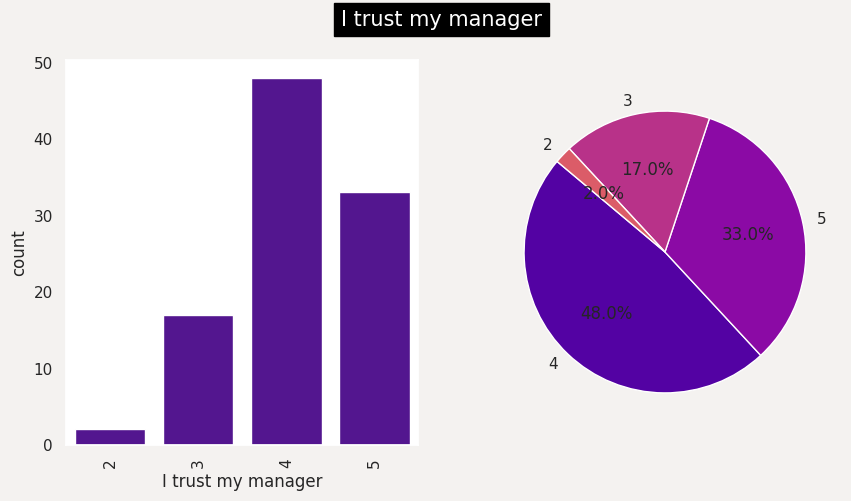

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


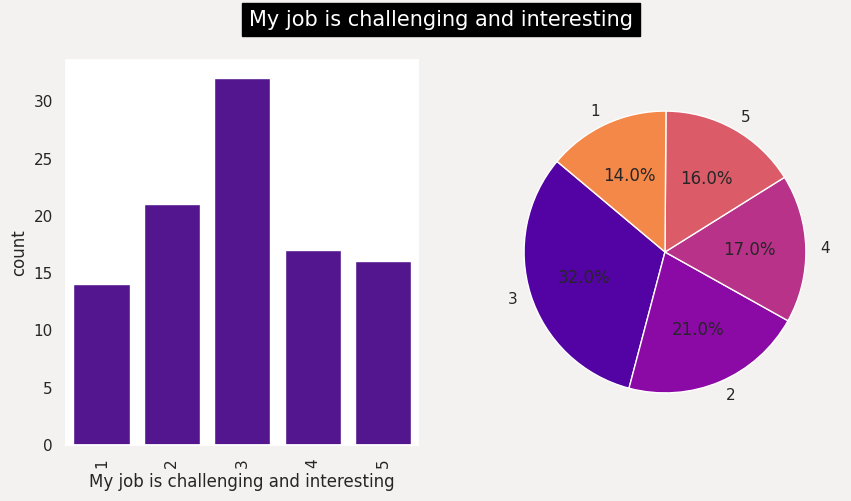

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


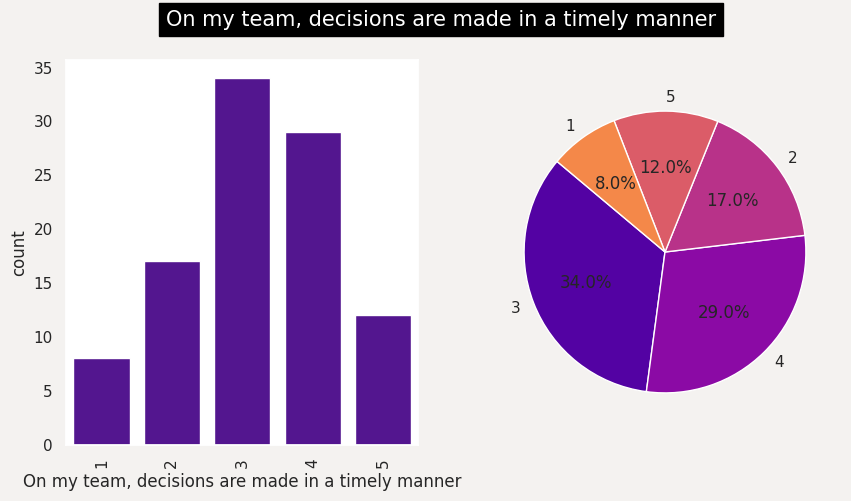

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


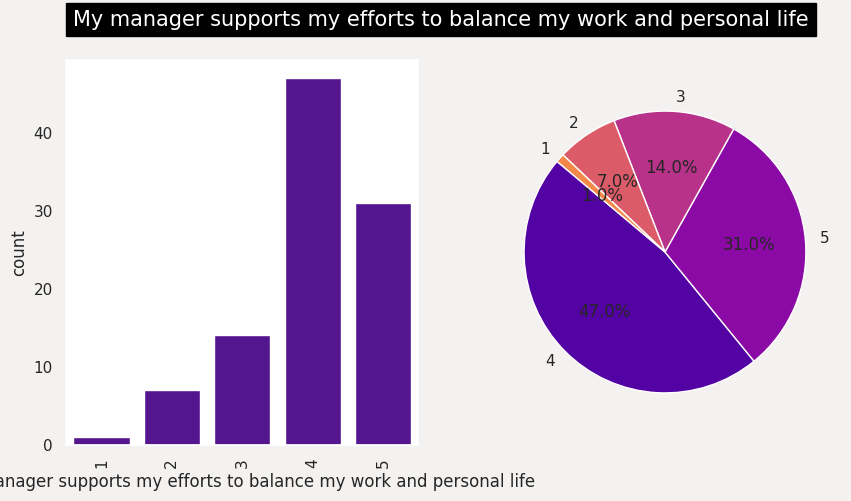

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


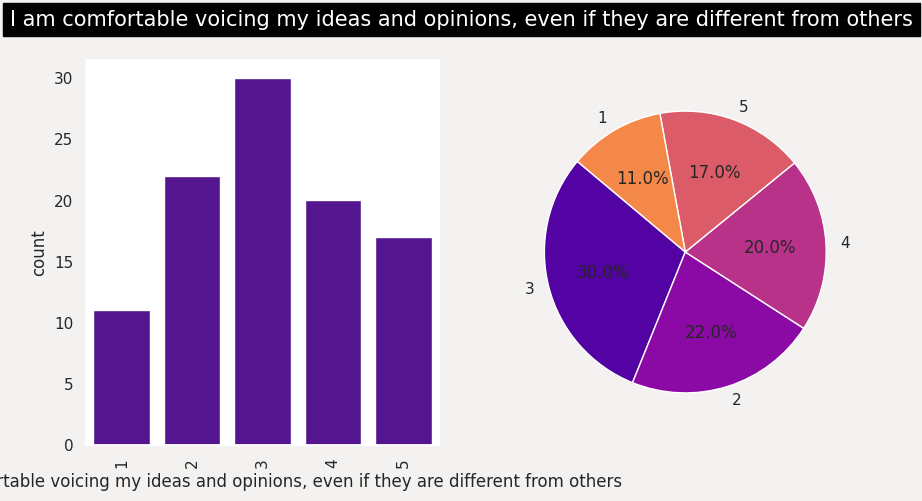

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


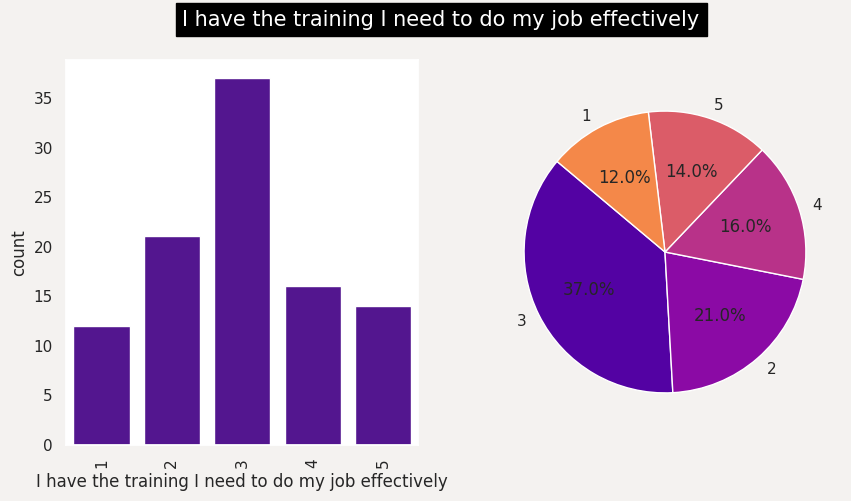

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


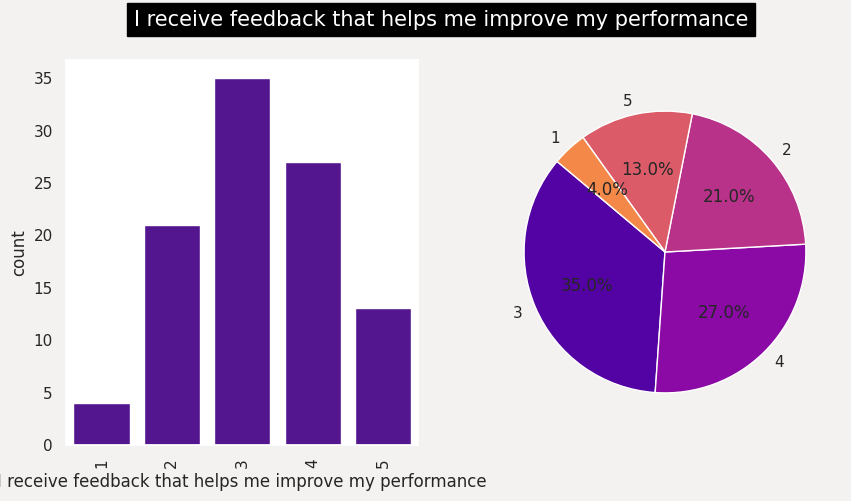

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


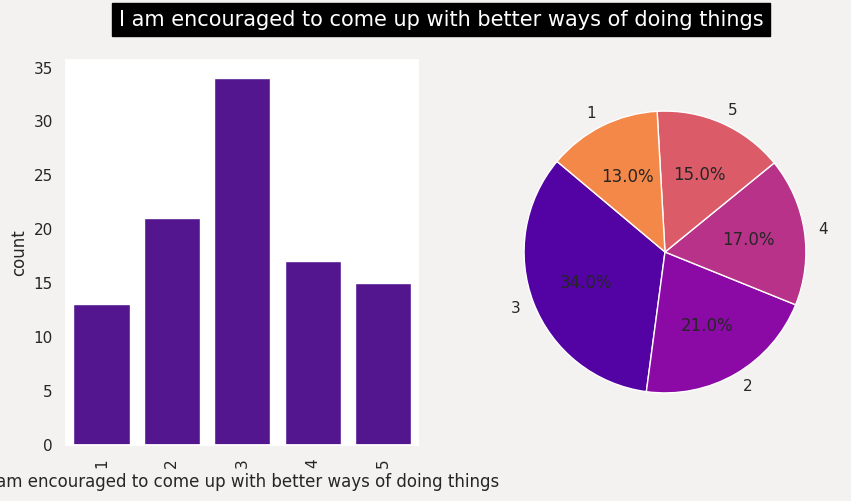

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


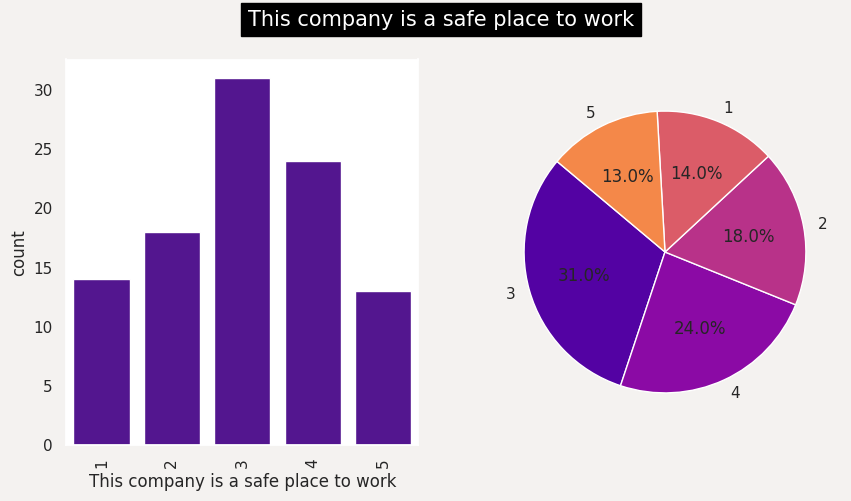

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


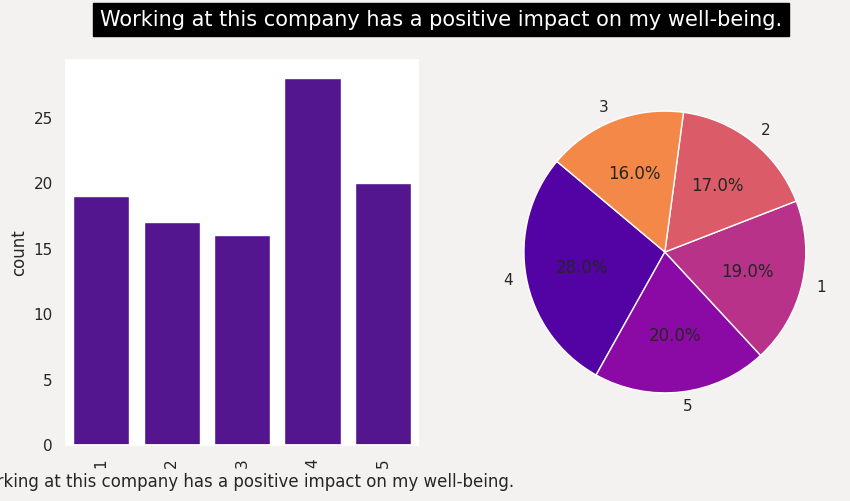

<ipython-input-17-b51b0fb5d273>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


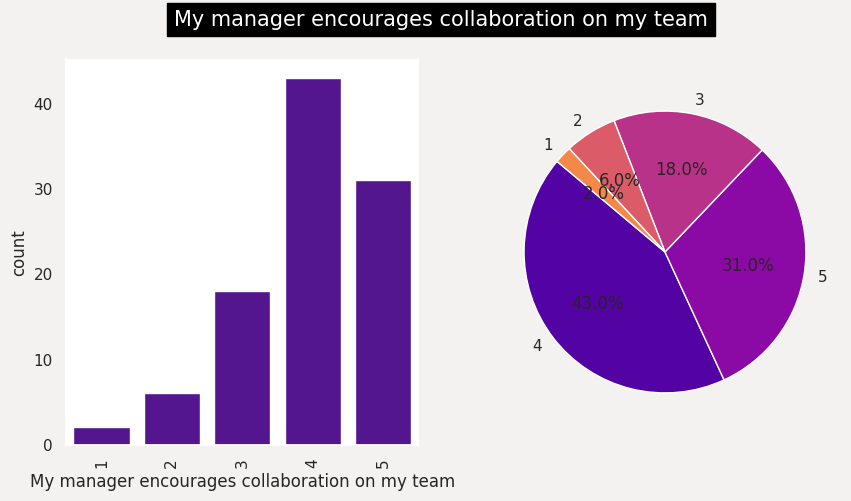

In [ ]:
# Assuming unique_counts_objects is a Series containing the number of unique values for each categorical variable
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": '#F4F2F0'})
sns.set_palette("plasma")

# Loop through each categorical variable and create countplot and pie chart
for col in unique_counts_objects.index:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Countplot
    ax1 = sns.countplot(data= combined_df_indexed, x=col, ax=axes[0])
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    # Pie chart
    count_values = combined_df_indexed[col].value_counts()
    ax2 = axes[1]
    ax2.pie(count_values, labels=count_values.index, autopct='%1.1f%%', startangle=140)
    ax2.set_aspect("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.suptitle(col, backgroundcolor='black', color='white', fontsize=15)
    plt.show()


In [ ]:
print(combined_df_indexed.columns)

Index(['Country', 'Tenure', 'Level', 'I am proud to work for this company',
       'I rarely think about looking for a new job with another company',
       'I would recommend this company to people I know as a great place to work',
       'My work gives me a feeling of personal accomplishment',
       'This company motivates me to contribute more than is normally required to complete my work',
       'Engagement index',
       'There is open and honest communication at this company',
       'At this company, there is effective collaboration between teams',
       'This company provides me with the opportunity for learning and development',
       'I receive appropriate recognition when I do a good job',
       'I trust my manager', 'My job is challenging and interesting',
       'On my team, decisions are made in a timely manner',
       'My manager supports my efforts to balance my work and personal life',
       'I am comfortable voicing my ideas and opinions, even if they are diffe

In [ ]:
#Converting text data to numeric data
columns_to_convert =['I am proud to work for this company',
       'I rarely think about looking for a new job with another company',
       'I would recommend this company to people I know as a great place to work',
       'My work gives me a feeling of personal accomplishment',
       'This company motivates me to contribute more than is normally required to complete my work',
       'Engagement index',
       'There is open and honest communication at this company',
       'At this company, there is effective collaboration between teams',
       'This company provides me with the opportunity for learning and development',
       'I receive appropriate recognition when I do a good job',
       'I trust my manager', 'My job is challenging and interesting',
       'On my team, decisions are made in a timely manner',
       'My manager supports my efforts to balance my work and personal life',
       'I am comfortable voicing my ideas and opinions, even if they are different from others',
       'I have the training I need to do my job effectively',
       'I receive feedback that helps me improve my performance',
       'I am encouraged to come up with better ways of doing things',
       'This company is a safe place to work',
       'Working at this company has a positive impact on my well-being.',
       'My manager encourages collaboration on my team']

# Convert each specified column to float64
for col in columns_to_convert:
    combined_df_indexed[col] = pd.to_numeric(combined_df_indexed[col], errors='coerce')


In [ ]:
# Check the data types of the DataFrame to ensure conversion
print(combined_df_indexed.dtypes)

Country                                                                                        object
Tenure                                                                                         object
Level                                                                                          object
I am proud to work for this company                                                             int64
I rarely think about looking for a new job with another company                                 int64
I would recommend this company to people I know as a great place to work                        int64
My work gives me a feeling of personal accomplishment                                           int64
This company motivates me to contribute more than is normally required to complete my work      int64
Engagement index                                                                              float64
There is open and honest communication at this company                            

In [ ]:
combined_df_indexed.to_excel('combined_df_indexed.xlsx', index=False)


In [ ]:
#Checking on numeric datatypes details
num=combined_df_indexed.select_dtypes(include=['int64','float64'])
num.describe().T

count   mean       std  \
I am proud to work for this company                 100.0  3.480  1.359441   
I rarely think about looking for a new job with...  100.0  3.550  1.274260   
I would recommend this company to people I know...  100.0  3.760  1.064771   
My work gives me a feeling of personal accompli...  100.0  3.070  1.191341   
This company motivates me to contribute more th...  100.0  3.610  0.919980   
Engagement index                                    100.0  3.494  0.826068   
There is open and honest communication at this ...  100.0  2.710  1.401983   
At this company, there is effective collaborati...  100.0  2.860  1.154875   
This company provides me with the opportunity f...  100.0  3.170  1.255734   
I receive appropriate recognition when I do a g...  100.0  3.110  1.213518   
I trust my manager                                  100.0  4.120  0.755853   
My job is challenging and interesting               100.0  3.000  1.263313   
On my team, decisions are made in a timely manner   100.0  3.200  1.110101   
My manager supports my efforts to balance my wo...  100.0  4.000  0.910100   
I am comfortable voicing my ideas and opinions,...  100.0  3.100  1.243163   
I have the training I need to do my job effecti...  100.0  2.990  1.193374   
I receive feedback that helps me improve my per...  100.0  3.240  1.055242   
I am encouraged to come up with better ways of ...  100.0  3.000  1.230915   
This company is a safe place to work                100.0  3.040  1.230258   
Working at this company has a positive impact o...  100.0  3.130  1.418884   
My manager encourages collaboration on my team      100.0  3.950  0.957427   

                                                    min   25%  50%   75%  max  
I am proud to work for this company                 1.0  2.75  4.0  5.00  5.0  
I rarely think about looking for a new job with...  1.0  3.00  4.0  5.00  5.0  
I would recommend this company to people I know...  1.0  3.00  4.0  5.00  5.0  
My work gives me a feeling of personal accompli...  1.0  2.00  3.0  4.00  5.0  
This company motivates me to contribute more th...  1.0  3.00  4.0  4.00  5.0  
Engagement index                                    1.2  3.15  3.6  4.05  4.8  
There is open and honest communication at this ...  1.0  1.00  3.0  4.00  5.0  
At this company, there is effective collaborati...  1.0  2.00  3.0  4.00  5.0  
This company provides me with the opportunity f...  1.0  2.00  3.0  4.00  5.0  
I receive appropriate recognition when I do a g...  1.0  2.00  3.0  4.00  5.0  
I trust my manager                                  2.0  4.00  4.0  5.00  5.0  
My job is challenging and interesting               1.0  2.00  3.0  4.00  5.0  
On my team, decisions are made in a timely manner   1.0  2.75  3.0  4.00  5.0  
My manager supports my efforts to balance my wo...  1.0  4.00  4.0  5.00  5.0  
I am comfortable voicing my ideas and opinions,...  1.0  2.00  3.0  4.00  5.0  
I have the training I need to do my job effecti...  1.0  2.00  3.0  4.00  5.0  
I receive feedback that helps me improve my per...  1.0  2.75  3.0  4.00  5.0  
I am encouraged to come up with better ways of ...  1.0  2.00  3.0  4.00  5.0  
This company is a safe place to work                1.0  2.00  3.0  4.00  5.0  
Working at this company has a positive impact o...  1.0  2.00  3.0  4.00  5.0  
My manager encourages collaboration on my team      1.0  3.00  4.0  5.00  5.0

<ipython-input-23-af8475005b51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = i, data = combined_df_indexed,palette=["#D4A1E7","#6faea4"])
<ipython-input-23-af8475005b51>:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(x = i, data = combined_df_indexed,palette=["#D4A1E7","#6faea4"])
<ipython-input-23-af8475005b51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = i, data = combined_df_indexed,palette=["#D4A1E7","#6faea4"])
<ipython-input-23-af8475005b51>:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(x = i, data = combined_df_indexed,palette=["#D4A1E7","#

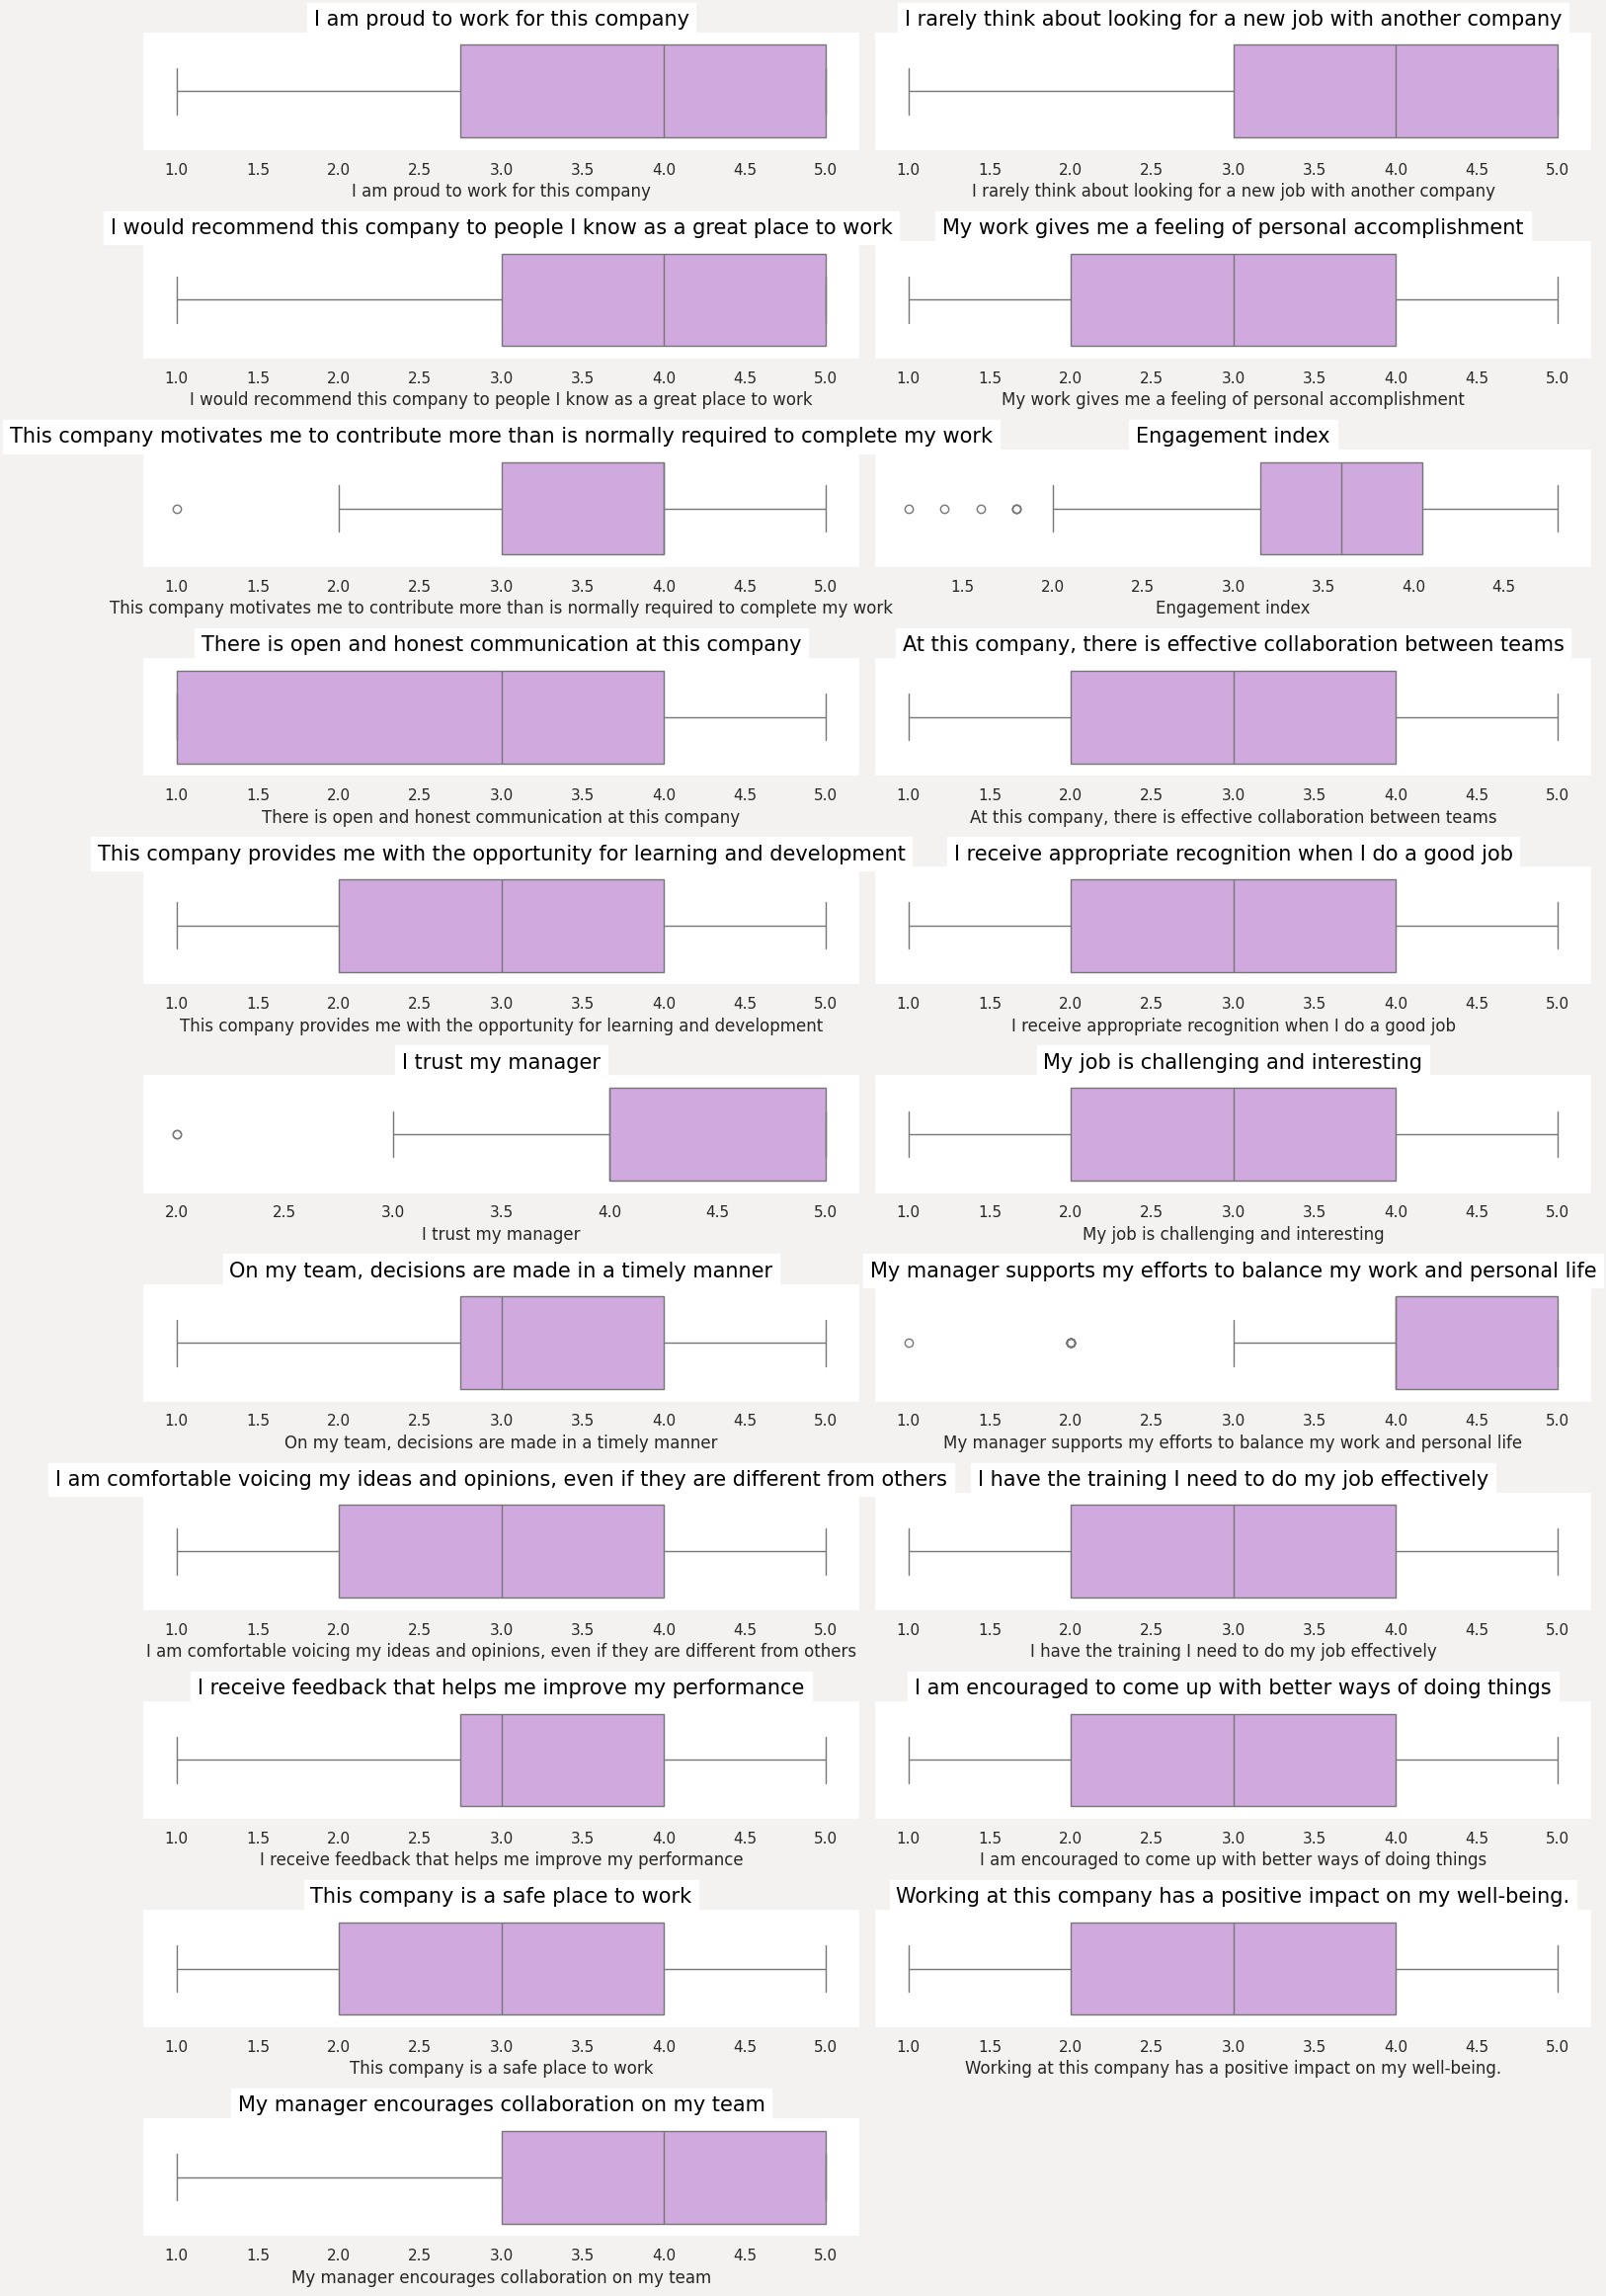

In [ ]:
#Creating plots
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = combined_df_indexed,palette=["#D4A1E7","#6faea4"])
    plt.title(i,backgroundcolor='white',color='black',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

# **Machine learning**


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
X = num
X.shape
X

I am proud to work for this company  \
ID                                         
1                                      4   
2                                      4   
3                                      5   
4                                      5   
5                                      4   
..                                   ...   
96                                     3   
97                                     3   
98                                     4   
99                                     1   
100                                    5   

     I rarely think about looking for a new job with another company  \
ID                                                                     
1                                                    5                 
2                                                    4                 
3                                                    4                 
4                                                    4                 
5                                                    5                 
..                                                 ...                 
96                                                   4                 
97                                                   2                 
98                                                   3                 
99                                                   2                 
100                                                  4                 

     I would recommend this company to people I know as a great place to work  \
ID                                                                              
1                                                    5                          
2                                                    5                          
3                                                    3                          
4                                                    5                          
5                                                    5                          
..                                                 ...                          
96                                                   5                          
97                                                   4                          
98                                                   2                          
99                                                   1                          
100                                                  4                          

     My work gives me a feeling of personal accomplishment  \
ID                                                           
1                                                    5       
2                                                    3       
3                                                    4       
4                                                    3       
5                                                    4       
..                                                 ...       
96                                                   3       
97                                                   5       
98                                                   3       
99                                                   1       
100                                                  2       

     This company motivates me to contribute more than is normally required to complete my work  \
ID                                                                                                
1                                                    3                                            
2                                                    2                                            
3                                                    2                                            
4                                                    2                                            
5                                       

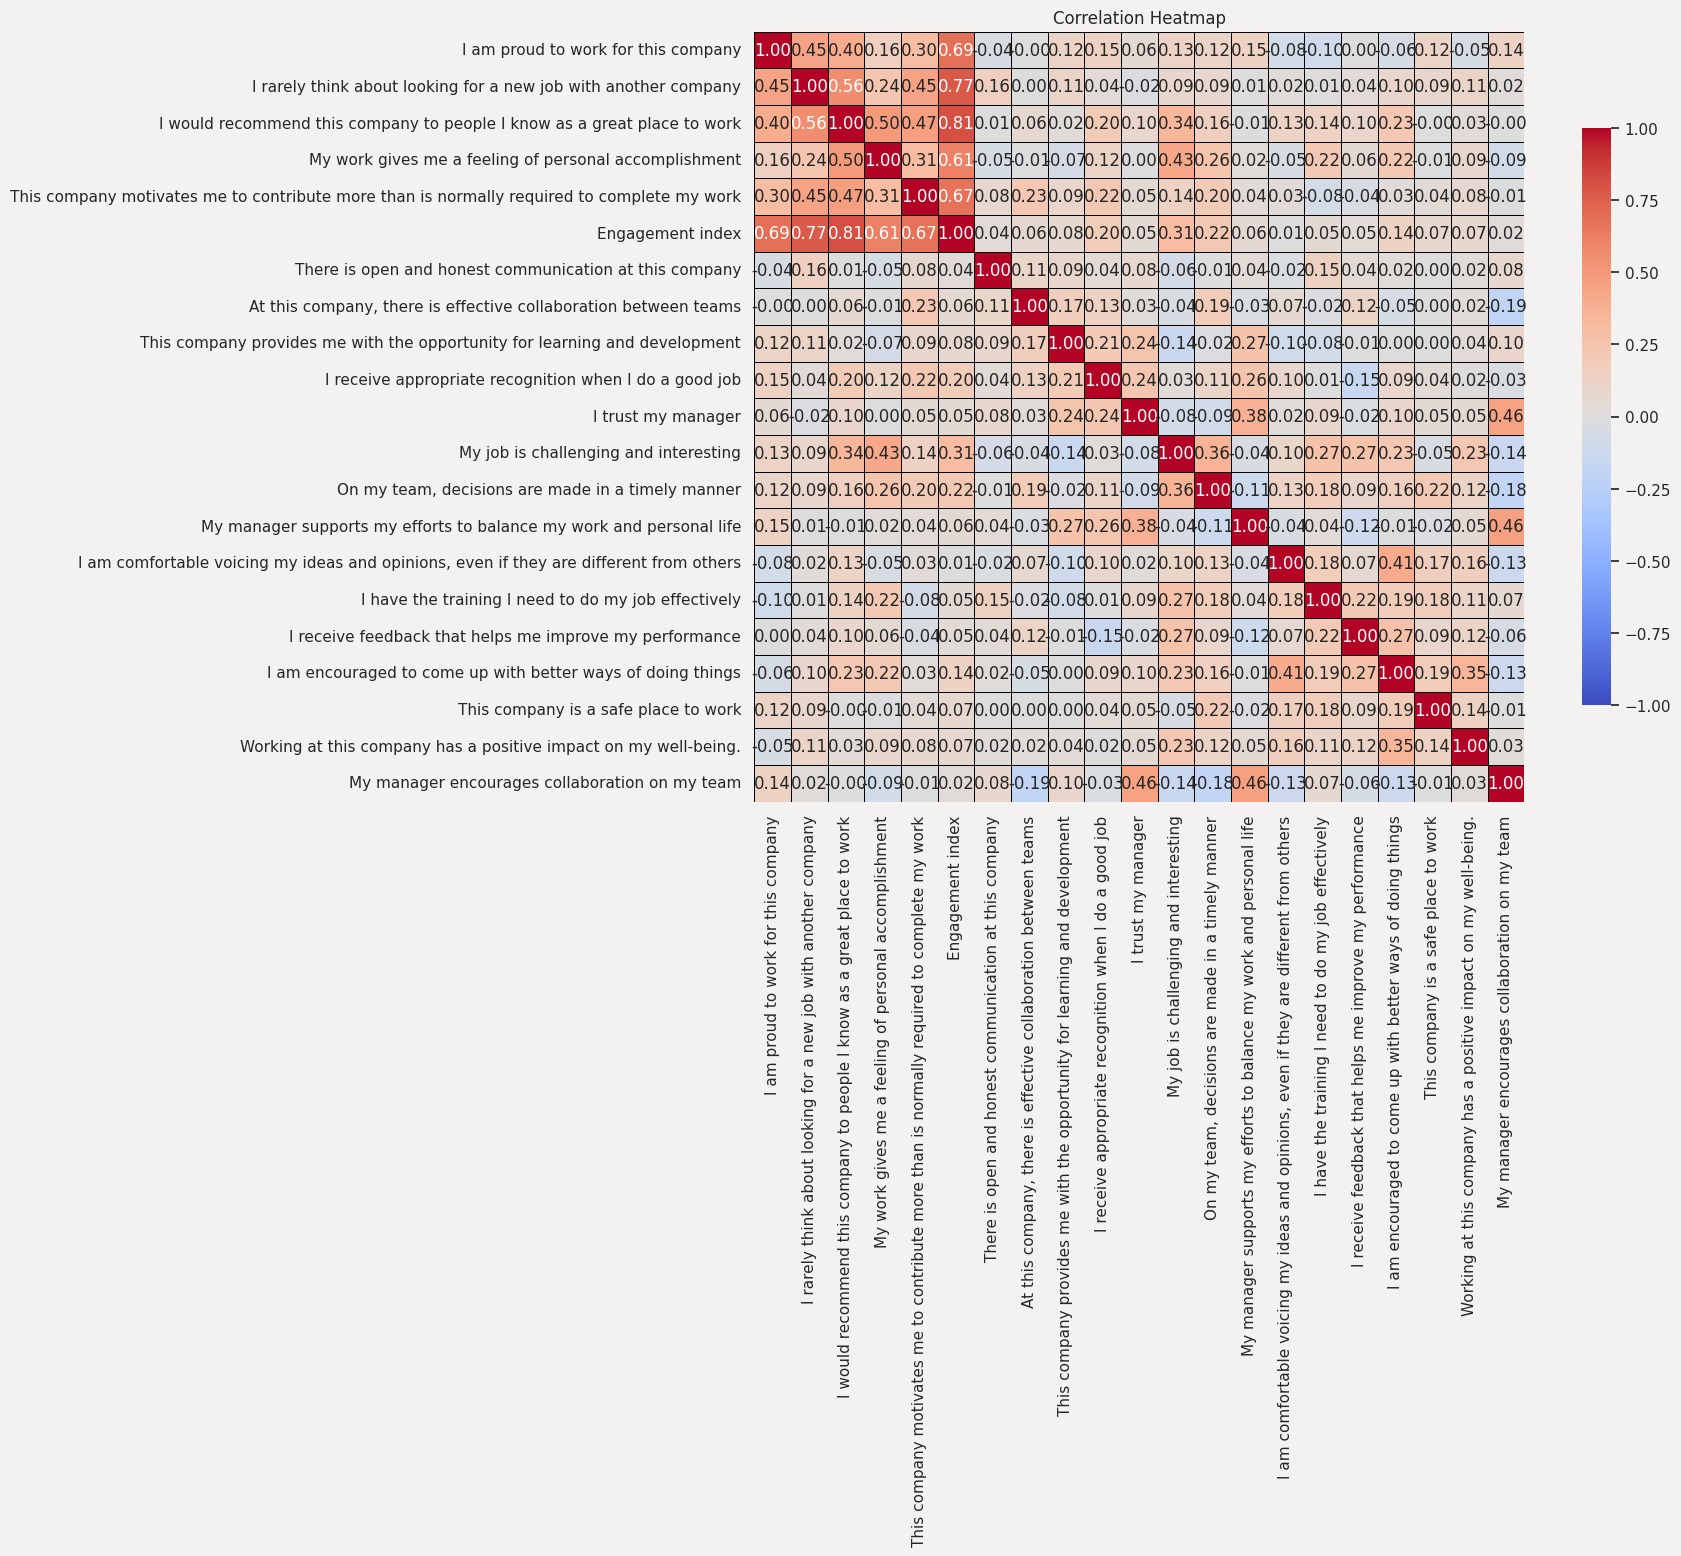

In [ ]:
# Compute the correlation matrix
correlation_matrix = X.corr()
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, linecolor='black', square=True, cbar_kws={'shrink': .75})

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Clustering
# Create a list to store inertia values and the values of k
inertia = []
# Create a list to set the range of k values to test
k = list(range(1, 11))


In [ ]:
# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the "customers_df" DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
# Review the DataFrame
df_elbow.head()

k      inertia
0  1  2789.026400
1  2  2451.987458
2  3  2228.504988
3  4  2134.416737
4  5  2053.849507

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

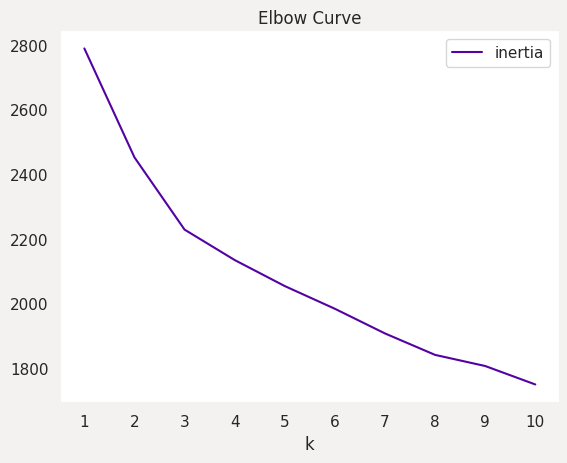

In [ ]:

# Plot the DataFrame to identify the optimal value for k
df_elbow.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

In [ ]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=3)

In [ ]:
# Fit the df_stocks_scaled data to the PCA
pca_data = pca.fit_transform(X)

In [ ]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.17507744, 0.11931894, 0.08846369])

In [ ]:
# Fit the PCA model to your data
pca.fit(X)
# Get the loadings (coefficients) for each feature
loadings = pca.components_
# Determine the absolute magnitude of the loadings
absolute_loadings = np.abs(loadings)
# Find the most important feature for each component
most_important_features = np.argmax(absolute_loadings, axis=1)
# Print the most important features for each component
for component, feature_idx in enumerate(most_important_features):
    feature_name = X.columns[feature_idx]
    print(f"Component {component+1}: Most important feature is {feature_name}")

Component 1: Most important feature is I rarely think about looking for a new job with another company
Component 2: Most important feature is I am proud to work for this company
Component 3: Most important feature is There is open and honest communication at this company
